## Описание тарифов


Тариф «Смарт» : ежемесячная плата: 550 рублей, включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика. Стоимость услуг сверх тарифного пакета: минута разговора: 3 рубля, сообщение: 3 рубля, 1 Гб интернет-трафика: 200 рублей
Тариф «Ультра»: ежемесячная плата: 1950 рублей, включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика. Стоимость услуг сверх тарифного пакета: минута разговора: 1 рубль, сообщение: 1 рубль, 1 Гб интернет-трафика: 150 рублей.
Примечание: 
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

# 1.Изучение данных из файлов

In [1]:
#Импортируем нужные нам библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

Читаем файлы:

In [2]:
calls_df = pd.read_csv('/datasets/calls.csv')

In [3]:
internet_df = pd.read_csv('/datasets/internet.csv')

In [4]:
messages_df = pd.read_csv('/datasets/messages.csv')

In [5]:
tariffs_df = pd.read_csv('/datasets/tariffs.csv')

In [6]:
users_df = pd.read_csv('//datasets/users.csv')

In [7]:
users_df = users_df.query('user_id !=1371 & user_id !=1128')

Далее я буду просматривать датафреймы и узнавать общую информацию о них методом info():

In [8]:
display(calls_df.head(10))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [9]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


call_date имеет неподходящий тип данных

In [10]:
display(internet_df.head(10))

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [11]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


session_date имеет неподходящий тип данных

In [12]:
display(messages_df.head(20))

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [13]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


message_date имеет неподходящий тип данных

In [14]:
display(tariffs_df.head(10))

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
tariffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [16]:
display(users_df.head(10))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [17]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     498 non-null    int64 
 1   age         498 non-null    int64 
 2   churn_date  36 non-null     object
 3   city        498 non-null    object
 4   first_name  498 non-null    object
 5   last_name   498 non-null    object
 6   reg_date    498 non-null    object
 7   tariff      498 non-null    object
dtypes: int64(2), object(6)
memory usage: 35.0+ KB


Дата регистрации имеет тип данных object, нужно исправить

# Предобработка данных

Меняем типы данных

In [18]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], yearfirst = True)

In [19]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], yearfirst = True)

In [20]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], yearfirst = True)

In [21]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], yearfirst = True) 

In [22]:
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], yearfirst = True) 

Для дальнейших расчетов нам понадобится перевесести время в класс DatetimeIndex и применить к нему атрибут 'month'

In [23]:
calls_df['month'] = pd.DatetimeIndex(calls_df['call_date']).month

In [24]:
internet_df['month'] = pd.DatetimeIndex(internet_df['session_date']).month

In [25]:
messages_df['month'] = pd.DatetimeIndex(messages_df['message_date']).month

Посмотрим, есть ли дубликаты

In [26]:
users_df.duplicated().sum()

0

In [27]:
calls_df.duplicated().sum()

0

In [28]:
internet_df.duplicated().sum()

0

In [29]:
messages_df.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверили дубликаты, многие студенты забывают.</font>

Посмотрим на минимальные и максимальные значения, присутствующие в каждом столбце датафрейма

In [30]:
users_df.min()

user_id                      1000
age                            18
churn_date    2018-08-17 00:00:00
city                  Архангельск
first_name              Авксентий
last_name                  Ёлчина
reg_date      2018-01-01 00:00:00
tariff                      smart
dtype: object

In [31]:
users_df.max()

user_id                      1499
age                            75
churn_date    2018-12-26 00:00:00
city                    Ярославль
first_name                    Яна
last_name                   Яшина
reg_date      2018-12-31 00:00:00
tariff                      ultra
dtype: object

In [32]:
calls_df.min()

id                        1000_0
call_date    2018-01-01 00:00:00
duration                     0.0
user_id                     1000
month                          1
dtype: object

In [33]:
calls_df.max()

id                       1499_99
call_date    2018-12-31 00:00:00
duration                    38.0
user_id                     1499
month                         12
dtype: object

In [34]:
internet_df.min()

Unnamed: 0                        0
id                           1000_0
mb_used                         0.0
session_date    2018-01-01 00:00:00
user_id                        1000
month                             1
dtype: object

In [35]:
internet_df.max()

Unnamed: 0                   149395
id                          1499_99
mb_used                     1724.83
session_date    2018-12-31 00:00:00
user_id                        1499
month                            12
dtype: object

<AxesSubplot:ylabel='Frequency'>

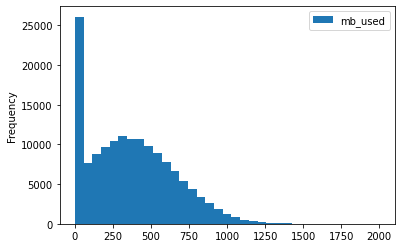

In [36]:
internet_df.plot(kind = 'hist', y = 'mb_used', bins = 35, range = (0,2000))

In [37]:
internet_df.query('mb_used >= 1250')

,Unnamed: 0,id,mb_used,session_date,user_id,month
93,93,1000_93,1364.05,2018-11-20,1000,11
693,693,1003_17,1333.87,2018-10-10,1003,10
843,843,1004_63,1268.72,2018-06-18,1004,6
885,885,1004_105,1284.76,2018-07-30,1004,7
1066,1066,1004_286,1312.73,2018-08-11,1004,8
...,...,...,...,...,...,...
144627,144627,1483_6,1266.28,2018-06-30,1483,6
146825,146825,1491_97,1284.40,2018-08-17,1491,8
147477,147477,1493_16,1327.40,2018-12-01,1493,12
147493,147493,1493_32,1387.78,2018-12-16,1493,12


<AxesSubplot:ylabel='Frequency'>

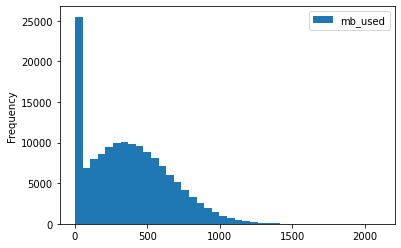

In [38]:
#Строим гистограмму по столбцу 'calls_duration' датафрейма smart_users
internet_df.plot(kind = 'hist', y = 'mb_used', bins = 40, range = (0,2100))

In [39]:
internet_df.query('mb_used == 0')

,Unnamed: 0,id,mb_used,session_date,user_id,month
11,11,1000_11,0.0,2018-08-28,1000,8
38,38,1000_38,0.0,2018-11-27,1000,11
46,46,1000_46,0.0,2018-06-30,1000,6
67,67,1000_67,0.0,2018-06-16,1000,6
72,72,1000_72,0.0,2018-06-15,1000,6
...,...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499,12
149381,149381,1499_142,0.0,2018-11-01,1499,11
149383,149383,1499_144,0.0,2018-11-27,1499,11
149386,149386,1499_147,0.0,2018-10-21,1499,10


<AxesSubplot:>

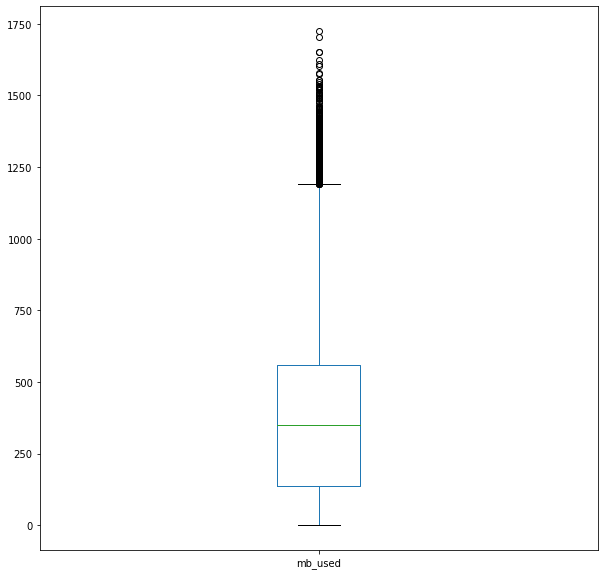

In [40]:
#Строим ящик с усами
plt.figure(figsize=(10,10))
internet_df['mb_used'].plot.box()

In [41]:
#Посмотрим на максимальное значение в столбце использованных гб датафрейма internet_df
internet_df['mb_used'].max()

1724.83

In [42]:
#Посмотрим строчку с максимальным значением потраченных мб за одну интернет-сессию
internet_df.query('mb_used > 1724')

,Unnamed: 0,id,mb_used,session_date,user_id,month
137493,137493,1461_9,1724.83,2018-11-28,1461,11


Сравним со средним и медианной:

In [43]:
internet_df['mb_used'].mean()

370.1924263701839

In [44]:
internet_df['mb_used'].median()

348.015

Конечно, данное значение портит общую картину, что мы видим по медиане, которая меньше среднего, но я не вижу ошибки в данных, израсходовать более гигабайта интернета вполне возможно, если скачивать фильмы, приложения итд. В данной ситуации значение выглядит правдоподобно, я хочу оставить его так,как есть. Но в дальнейшем я предлагаю посмотреть значения использованных за месяц гигабайтов конкретных пользователей, если будут подозрительные значения-проведем исследование и решим что делать

Подозрительные данные на данном этапе не обнаружены

# Вычисления

Совершим перевод из мегабайт в гигабайты и сохраним результаты в новой колонке

In [45]:
internet_df['gb_used'] = internet_df['mb_used']/1024

Мегалайн всегда округляет секунды до минут, а мегабайты — до гигабайт. Для правильных расчётов в будущем нам лучше сразу заняться округлением, но нужно учитывать факт того, что любой звонок протяженностью даже в секунду огругляется до минуты, а вот с интернетом дела обстоят другим образом, общая сумма израсходованных за месяц мегабайтов округляется до гигабайтов, а отдельные сессии, в свою очередь, не округляются

In [46]:
#Округляем продолжительность звонков с секунд до минуты
calls_df['duration'] =  np.ceil(calls_df['duration'])

Создадим новый датафрейм, он пригодится для указания тарифов пользователей в таблице с данными о трафике, звонках и сообщениях, разделенных по месяцам

In [47]:
#Создаем новый датафрейм,
users_table = users_df.groupby(['user_id'])['tariff'].sum()

In [48]:
#Воспроизводим 
display(users_table)

user_id
1000    ultra
1001    smart
1002    smart
1003    ultra
1004    ultra
        ...  
1495    ultra
1496    smart
1497    smart
1498    smart
1499    smart
Name: tariff, Length: 498, dtype: object

In [49]:
#Сбросим индексацию для последующего обьединения с другим датафремом
users_table = users_table.reset_index()

Сгрупируем данные из трёх датафреймов по месяцу и идентификатору пользователя:

In [50]:
#Группируем данные и создаем новый датафрейм
internet_table = internet_df.groupby(['user_id', 'month'])['gb_used'].sum()

In [51]:
#Группируем данные и создаем новый датафрейм
calls_table = calls_df.groupby(['user_id', 'month'])['duration'].sum()

In [52]:
#Группируем данные и создаем новый датафрейм
calls_table_two = calls_df.groupby(['user_id', 'month'])['id'].count()

Сбросим индексацию:

In [53]:
calls_table = calls_table.reset_index()

In [54]:
calls_table_two = calls_table_two.reset_index()

In [55]:
#Обьединяем два датафрейма в один
calls_joined = calls_table.merge(calls_table_two, on= ['user_id', 'month'],  how ='outer')

In [56]:
#Воспроизводим новый датафрейм
display(calls_joined)

,user_id,month,duration,id
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58
...,...,...,...,...
3169,1498,10,247.0,41
3170,1499,9,70.0,9
3171,1499,10,449.0,68
3172,1499,11,612.0,74


2 столбца имеют не очень подходящие названия, а значит мы должны их поменять

In [57]:
#Переименовываем названия столбцов
calls_joined = calls_joined.rename(columns = {'id': 'calls_amount', 'duration': 'calls_duration'})

In [58]:
#Проверяем произошла ли замена названий столбцов
display(calls_joined)

,user_id,month,calls_duration,calls_amount
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58
...,...,...,...,...
3169,1498,10,247.0,41
3170,1499,9,70.0,9
3171,1499,10,449.0,68
3172,1499,11,612.0,74


In [59]:
#Создадим новый обьект series для дальнейшего обьединения
messages_table = messages_df.groupby(['user_id', 'month'])['id'].count()

Сбросим индексы фреймов данных для дальнейшего обьединения:

In [60]:
messages_table = messages_table.reset_index()

In [61]:
calls_joined = calls_joined.reset_index()

In [62]:
internet_table = internet_table.reset_index()

Обьединим calls_joined и messages_table в новый датафрейм:

In [63]:
users_data_joined = calls_joined.merge(messages_table, on= ['user_id', 'month'],  how ='outer')

In [64]:
#Посмотрим на новый датафрейм
display(users_data_joined)

,index,user_id,month,calls_duration,calls_amount,id
0,0.0,1000,5,159.0,22.0,22.0
1,1.0,1000,6,172.0,43.0,60.0
2,2.0,1000,7,340.0,47.0,75.0
3,3.0,1000,8,408.0,52.0,81.0
4,4.0,1000,9,466.0,58.0,57.0
...,...,...,...,...,...,...
3208,NaN,1489,8,NaN,NaN,17.0
3209,NaN,1489,9,NaN,NaN,32.0
3210,NaN,1489,10,NaN,NaN,21.0
3211,NaN,1489,11,NaN,NaN,20.0


У одного столбца неподходящие названия, изменим его:

In [65]:
#Меняем название
users_data_joined = users_data_joined.rename(columns = {'id': 'messages_amount'})

Добавим к users_data_joined данные из internet_table:

In [66]:
#Обьединим датафреймы
users_data_joined = users_data_joined.merge(internet_table, on= ['user_id', 'month'],  how ='outer')

In [67]:
#Округлим
users_data_joined['gb_used'] =  np.ceil(users_data_joined['gb_used'])

In [68]:
#Посмотрим информацию о датафрейме
users_data_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            3174 non-null   float64
 1   user_id          3214 non-null   int64  
 2   month            3214 non-null   int64  
 3   calls_duration   3174 non-null   float64
 4   calls_amount     3174 non-null   float64
 5   messages_amount  2717 non-null   float64
 6   gb_used          3203 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 200.9 KB


Добавим к users_data_joined данные из users_table, таким образом в датафрейме будут указаны тарифы пользователей

In [69]:
#Обьединяем таблицы
users_data_joined = users_data_joined.merge(users_table, on= ['user_id'],  how ='outer')

In [70]:
#Смотрим на общий датафрейм
display(users_data_joined)

,index,user_id,month,calls_duration,calls_amount,messages_amount,gb_used,tariff
0,0.0,1000,5,159.0,22.0,22.0,3.0,ultra
1,1.0,1000,6,172.0,43.0,60.0,23.0,ultra
2,2.0,1000,7,340.0,47.0,75.0,14.0,ultra
3,3.0,1000,8,408.0,52.0,81.0,14.0,ultra
4,4.0,1000,9,466.0,58.0,57.0,15.0,ultra
...,...,...,...,...,...,...,...,...
3209,NaN,1489,8,NaN,NaN,17.0,11.0,smart
3210,NaN,1489,9,NaN,NaN,32.0,17.0,smart
3211,NaN,1489,10,NaN,NaN,21.0,20.0,smart
3212,NaN,1489,11,NaN,NaN,20.0,18.0,smart


In [71]:
#Посмотрим информацию о датафрейме
users_data_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            3174 non-null   float64
 1   user_id          3214 non-null   int64  
 2   month            3214 non-null   int64  
 3   calls_duration   3174 non-null   float64
 4   calls_amount     3174 non-null   float64
 5   messages_amount  2717 non-null   float64
 6   gb_used          3203 non-null   float64
 7   tariff           3214 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 226.0+ KB


In [72]:
#Посмотрим в каких столбцах есть Nan
users_data_joined.isna().sum()

index               40
user_id              0
month                0
calls_duration      40
calls_amount        40
messages_amount    497
gb_used             11
tariff               0
dtype: int64

на данном этапе я считаю логичным заменить все пропуски на 0, кроме пропусков в столбце месяца :

In [73]:
users_data_joined['gb_used'] = users_data_joined['gb_used'].fillna(0)

In [74]:
users_data_joined['calls_duration'] = users_data_joined['calls_duration'].fillna(0)

In [75]:
users_data_joined['messages_amount'] = users_data_joined['messages_amount'].fillna(0)

In [76]:
users_data_joined['calls_amount'] = users_data_joined['calls_amount'].fillna(0)

In [77]:
#Проверка замен
users_data_joined.isna().sum()

index              40
user_id             0
month               0
calls_duration      0
calls_amount        0
messages_amount     0
gb_used             0
tariff              0
dtype: int64

Значения отсутствуют только в столбце с индексами,чуть позже мы удалим его по причине ненадобности

In [78]:
display(users_data_joined)

,index,user_id,month,calls_duration,calls_amount,messages_amount,gb_used,tariff
0,0.0,1000,5,159.0,22.0,22.0,3.0,ultra
1,1.0,1000,6,172.0,43.0,60.0,23.0,ultra
2,2.0,1000,7,340.0,47.0,75.0,14.0,ultra
3,3.0,1000,8,408.0,52.0,81.0,14.0,ultra
4,4.0,1000,9,466.0,58.0,57.0,15.0,ultra
...,...,...,...,...,...,...,...,...
3209,NaN,1489,8,0.0,0.0,17.0,11.0,smart
3210,NaN,1489,9,0.0,0.0,32.0,17.0,smart
3211,NaN,1489,10,0.0,0.0,21.0,20.0,smart
3212,NaN,1489,11,0.0,0.0,20.0,18.0,smart


Ранее мы округлили значения в двух столбцах, если значения стали целыми, логично перевести их в целочисленный тип данных 

In [79]:
users_data_joined['gb_used'] = users_data_joined['gb_used'].astype(int)

In [80]:
# Комментарий ревьюера 3
display(internet_df.head(12))
display(internet_table.head(12))
display(users_data_joined.head(12))

,Unnamed: 0,id,mb_used,session_date,user_id,month,gb_used
0,0,1000_0,112.95,2018-11-25,1000,11,0.110303
1,1,1000_1,1052.81,2018-09-07,1000,9,1.028135
2,2,1000_2,1197.26,2018-06-25,1000,6,1.169199
3,3,1000_3,550.27,2018-08-22,1000,8,0.537373
4,4,1000_4,302.56,2018-09-24,1000,9,0.295469
5,5,1000_5,399.97,2018-10-02,1000,10,0.390596
6,6,1000_6,540.08,2018-09-07,1000,9,0.527422
7,7,1000_7,415.70,2018-07-11,1000,7,0.405957
8,8,1000_8,505.40,2018-10-08,1000,10,0.493555
9,9,1000_9,345.54,2018-09-03,1000,9,0.337441


,user_id,month,gb_used
0,1000,5,2.200674
1,1000,6,22.689229
2,1000,7,13.675430
3,1000,8,13.726494
4,1000,9,14.227451
5,1000,10,14.357900
6,1000,11,14.410615
7,1000,12,9.587510
8,1001,11,17.997402
9,1001,12,13.707676


,index,user_id,month,calls_duration,calls_amount,messages_amount,gb_used,tariff
0,0.0,1000,5,159.0,22.0,22.0,3,ultra
1,1.0,1000,6,172.0,43.0,60.0,23,ultra
2,2.0,1000,7,340.0,47.0,75.0,14,ultra
3,3.0,1000,8,408.0,52.0,81.0,14,ultra
4,4.0,1000,9,466.0,58.0,57.0,15,ultra
5,5.0,1000,10,350.0,57.0,73.0,15,ultra
6,6.0,1000,11,338.0,43.0,58.0,15,ultra
7,7.0,1000,12,333.0,46.0,70.0,10,ultra
8,8.0,1001,11,430.0,59.0,0.0,18,smart
9,9.0,1001,12,414.0,63.0,0.0,14,smart


In [81]:
users_data_joined['calls_duration'] = users_data_joined['calls_duration'].astype(int)

In [82]:
#Проверка изменения
users_data_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            3174 non-null   float64
 1   user_id          3214 non-null   int64  
 2   month            3214 non-null   int64  
 3   calls_duration   3214 non-null   int64  
 4   calls_amount     3214 non-null   float64
 5   messages_amount  3214 non-null   float64
 6   gb_used          3214 non-null   int64  
 7   tariff           3214 non-null   object 
dtypes: float64(3), int64(4), object(1)
memory usage: 226.0+ KB


Еще в паре столбцов нужно изменить типы данных на более подходящие. Количество звонков, сообщений и месяца не могут быть не целыми числами

In [83]:
users_data_joined['calls_amount'] = users_data_joined['calls_amount'].astype(int)

In [84]:
users_data_joined['messages_amount'] = users_data_joined['messages_amount'].astype(int)

In [85]:
users_data_joined['month'] = users_data_joined['month'].astype(int)

In [86]:
#Проверка изменения
users_data_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            3174 non-null   float64
 1   user_id          3214 non-null   int64  
 2   month            3214 non-null   int64  
 3   calls_duration   3214 non-null   int64  
 4   calls_amount     3214 non-null   int64  
 5   messages_amount  3214 non-null   int64  
 6   gb_used          3214 non-null   int64  
 7   tariff           3214 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 226.0+ KB


Напишем функцию для подсчёта помесячной выручки

In [87]:
def tariff_expenses_raw (raw):
    tariff = raw['tariff']
    calls = raw['calls_duration']
    message = raw['messages_amount'] 
    gb = raw['gb_used'] 
        
    if tariff == 'ultra':
        if calls > 3000: 
            calls = (calls - 3000) * 1
        else:
            calls = 0
        
        if message > 1000:
            message = (message-1000) * 1
        else:
            message = 0
                
        if gb >=30:
            gb = (gb - 30) * 150
        else:
            gb = 0
        return 1950 + calls + message + gb

    if tariff == 'smart':
        if calls > 500: 
            calls = (calls - 500)*3
        else:
            calls = 0
        
        if message > 50:
            message = (message-50) * 3
        else:
            message = 0
                
        if gb > 15:
                gb = (gb - 15) * 200
        else:
            gb = 0
        return 550 + calls + message + gb

users_data_joined['tariff_expenses'] = users_data_joined.apply(tariff_expenses_raw, axis = 1)
users_data_joined.head(30)

,index,user_id,month,calls_duration,calls_amount,messages_amount,gb_used,tariff,tariff_expenses
0,0.0,1000,5,159,22,22,3,ultra,1950
1,1.0,1000,6,172,43,60,23,ultra,1950
2,2.0,1000,7,340,47,75,14,ultra,1950
3,3.0,1000,8,408,52,81,14,ultra,1950
4,4.0,1000,9,466,58,57,15,ultra,1950
5,5.0,1000,10,350,57,73,15,ultra,1950
6,6.0,1000,11,338,43,58,15,ultra,1950
7,7.0,1000,12,333,46,70,10,ultra,1950
8,8.0,1001,11,430,59,0,18,smart,1150
9,9.0,1001,12,414,63,0,14,smart,550


Как мы видим,на каком-то этапе соединения таблиц у нас появился индекс, нужно его убрать

In [88]:
#Убираем столбец с индексами
del users_data_joined['index']

In [90]:
# Комментарий ревьюера
users_data_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          3214 non-null   int64 
 1   month            3214 non-null   int64 
 2   calls_duration   3214 non-null   int64 
 3   calls_amount     3214 non-null   int64 
 4   messages_amount  3214 non-null   int64 
 5   gb_used          3214 non-null   int64 
 6   tariff           3214 non-null   object
 7   tariff_expenses  3214 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 226.0+ KB


# Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Разделим общий датафрейм на два аналогичных, исходя из тарифа пользователя

In [92]:
ultra_users = users_data_joined.query('tariff == "ultra"')

In [93]:
display(ultra_users.head(10))

,user_id,month,calls_duration,calls_amount,messages_amount,gb_used,tariff,tariff_expenses
0,1000,5,159,22,22,3,ultra,1950
1,1000,6,172,43,60,23,ultra,1950
2,1000,7,340,47,75,14,ultra,1950
3,1000,8,408,52,81,14,ultra,1950
4,1000,9,466,58,57,15,ultra,1950
5,1000,10,350,57,73,15,ultra,1950
6,1000,11,338,43,58,15,ultra,1950
7,1000,12,333,46,70,10,ultra,1950
17,1003,8,380,55,37,9,ultra,1950
18,1003,9,961,134,91,13,ultra,1950


In [94]:
smart_users = users_data_joined.query('tariff == "smart"')

In [95]:
display(smart_users.head(10))

,user_id,month,calls_duration,calls_amount,messages_amount,gb_used,tariff,tariff_expenses
8,1001,11,430,59,0,18,smart,1150
9,1001,12,414,63,0,14,smart,550
10,1002,6,117,15,4,11,smart,550
11,1002,7,214,26,11,18,smart,1150
12,1002,8,289,42,13,20,smart,1550
13,1002,9,206,36,4,17,smart,950
14,1002,10,212,33,10,14,smart,550
15,1002,11,243,32,16,19,smart,1350
16,1002,12,236,33,12,18,smart,1150
30,1005,1,95,15,7,3,smart,550


## Сообщения

In [96]:
#Смотрим среднее в датафрейме smart_users по столбцу messages_amount
smart_users['messages_amount'].mean()

33.384028712427096

In [97]:
#Смотрим среднее в датафрейме ultra_users по столбцу messages_amount
ultra_users['messages_amount'].mean()

49.36345177664975

Среднее количество отправленных сообщений довольно отличается в зависимости от группы. Но если учесть, что в тариф ультра включено в 20 раз больше сообщений, чем в смарт, разница не кажется такой большой

In [98]:
#Смотрим медиану в датафрейме smart_users по столбцу messages_amount
smart_users['messages_amount'].median()

28.0

In [99]:
#Смотрим медиану в датафрейме ultra_users по столбцу messages_amount
ultra_users['messages_amount'].median()

38.0

In [100]:
#Смотрим дисперсию в датафрейме smart_users по столбцу messages_amount
np.var(smart_users['messages_amount'])

796.455482917076

In [101]:
#Смотрим дисперсию в датафрейме ultra_users по столбцу messages_amount
np.var(ultra_users['messages_amount'])

2282.946075394882

In [102]:
#Смотрим стандартное отклонение в датафрейме smart_users по столбцу messages_amount
np.std(smart_users['messages_amount'])

28.221542886898938

In [103]:
#Смотрим стандартное отклонение в датафрейме ultra_users по столбцу messages_amount
np.std(ultra_users['messages_amount'])

47.78018496610161

Дисперссии и стандартные отклонения в обоих датафреймах довольно велики по отношению к математическому ожиданию, данные имеют большой разброс

Количество сообщений- дискретная переменная, поэтому нам логично использовать обычную гистограмму.

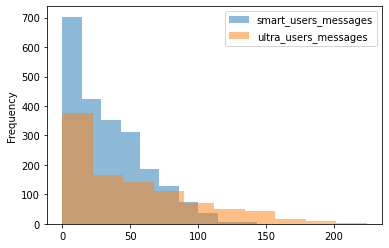

In [104]:
#Строим две гистограммы по столбцам 'messages_amount' датафреймов smart_users и ultra_users
bins = 50
smart_users['messages_amount'].plot.hist(bins, alpha=0.5, label = 'smart_users_messages')
ultra_users['messages_amount'].plot.hist(bins, alpha=0.5, label = 'ultra_users_messages')
plt.legend(loc='upper right')
plt.show()

Среди пользователей тарифа смарт смс сообщения не сильно популярны и большинство отправляет менее 10 сообщений в месяц, хотя в тариф включено 50 сообщений. Однако, есть пользователи, которые выходят за обозначенный лимит и готовы платить сверх тарифа.

На удивление, при пакете, включающем 1000 сообщений, среди пользователей тарифа ультра, смс сообщения тоже не слишком популярны. При этом, пользователи тарифа ультра чаще отправляют более 120 сообщений
Можно сделать вывод, что пользователи тарифа ультра выбирают его не из-за количества включенных сообщений, а значит для них важно либо количество включенных минут разговора, либо гигабайтов.

Визуализация важна, но стоит посмотреть на пиковые и пороговые значения отправленных сообщений:

In [105]:
#Смотрим минимальное значение по датафрейму
smart_users['messages_amount'].min()

0

In [106]:
#Смотрим максимальное значение по датафрейму
smart_users['messages_amount'].max()

143

In [107]:
#Смотрим минимальное значение по датафрейму
ultra_users['messages_amount'].min()

0

In [108]:
#Смотрим максимальное значение по датафрейму
ultra_users['messages_amount'].max()

224

Пользователи обоих тарифов могут не отправлять сообщения вообще, а вот максимальные значения в двух группах сильно отличаются. Количество сообщений, включенных в тариф ультра, скорее является маркетинговым ходом, красивое число может привлечь пользователей, хотя ни у кого из них нет необходимости в таком количестве сообщений.

## Звонки

In [109]:
#Смотрим среднее в датафрейме smart_users по столбцу calls_duration
smart_users['calls_duration'].mean()

417.9349484073576

In [110]:
#Смотрим среднее в датафрейме ultra_users по столбцу calls_duration
ultra_users['calls_duration'].mean()

526.6233502538071

Среднее по пользователям тарифа ультра выглядит странно, оно немного превышает количество включенных в смарт пакет минут, но даже близко не находится с количеством минут, включенных в ультра пакет. Есть предположение, что часть пользователей платит лишь за количество гигабайтов, включенных в пакет.

In [111]:
#Смотрим медиану в датафрейме smart_users по столбцу calls_duration
smart_users['calls_duration'].median()

422.0

In [112]:
#Смотрим медиану в датафрейме ultra_users по столбцу calls_duration
ultra_users['calls_duration'].median()

518.0

In [113]:
#Смотрим дисперсию в датафрейме smart_users по столбцу calls_duration
np.var(smart_users['calls_duration'])

36203.06665209469

In [114]:
#Смотрим дисперсию в датафрейме ultra_users по столбцу calls_duration
np.var(ultra_users['calls_duration'])

100771.2236172022

In [115]:
#Смотрим стандартное отклонение в датафрейме smart_users по столбцу calls_duration
np.std(smart_users['calls_duration'])

190.27103471651876

In [116]:
#Смотрим стандартное отклонение в датафрейме ultra_users по столбцу calls_duration
np.std(ultra_users['calls_duration'])

317.44483554974113

Стандартные отклонения в обоих случаях относительно близки к половине от средних,  они же математические ожидания, одно меньше половины (стандартное отклонение smart_users), другое больше (стандартное отклонение ultra_users). Данные имеют большой разброс.

Если бы мы не округлили значения в силу политики компании («Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт), мы бы рассуждали так, что протяженность звонков это непрерывная переменная, т.е может принимать любые численные значения на промежутке, поэтому лучше визуализировать данные с помощью гистограммы частот для непрерывной переменной. Но в данном секунды не важны для нас, поэтому мы строим обычную гистограмму.

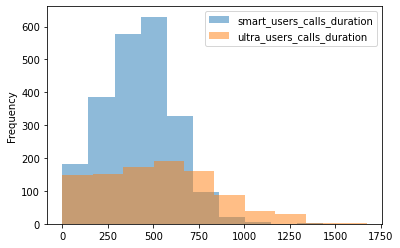

In [117]:
#Строим две гистограммы по столбцам 'calls_duration' датафреймов smart_users и ultra_users
bins = 50
smart_users['calls_duration'].plot.hist(bins, alpha=0.5, label = 'smart_users_calls_duration')
ultra_users['calls_duration'].plot.hist(bins, alpha=0.5, label = 'ultra_users_calls_duration')
plt.legend(loc='upper right')
plt.show()

Здесь можно отметить, что какая-то часть пользователей обоих тарифов совсем не пользуется звонками, но это довольно странно для пользователей более дорогово тарифа ультра. Некоторые пользователи тарифа смарт выходят за число минут,входящих в пакет, и визуально их долю нельзя назвать маленькой.
В то же время, никто из пользователей тарифа ультра не использует выбранный тариф на максимум, максимально пользователи тарифа ультра используют половину от включенных в тариф минут разговора, здесь, как и с количеством сообщений, включенных в пакет, есть подозрение, что оператор просто использовал маркетинговый ход, хотя 3000 минут разговора не являются нужными кому-либо, но могу привлекать пользователей из-за большой цифры.
На данном этапе мне не очень нравится подозрительный пик около 1400 гистограммы ultra_users_calls_duration, он находится на большом расстоянии от ближайшего пика, я предпочту проверить данное значение. Посмотрим на всякий случай максимальное значение по данному столбцу датафрейма.

In [118]:
#Смотрим максимальное значение в столбце calls_amount датафрейма ultra_users
ultra_users['calls_duration'].max()

1673

In [119]:
#Смотрим информацию о пользователях, которые говорили более 1400 минут
ultra_users.query('calls_duration > 1400')

,user_id,month,calls_duration,calls_amount,messages_amount,gb_used,tariff,tariff_expenses
1237,1196,6,1410,176,153,23,ultra,1950
2360,1377,3,1609,203,20,3,ultra,1950
2367,1377,10,1401,178,10,5,ultra,1950
2973,1467,12,1673,244,39,10,ultra,1950


In [120]:
#Смотрим среднее по столбцу calls_amount датафрейма ultra_users
ultra_users['calls_amount'].mean()

73.39289340101523

Логично думать, что если количество израсходованных минут очень большое, то и количество звонков будет куда больше среднего. Конечно, мы перепроверим это суждение, посмотрев корреляцию.

In [121]:
ultra_users['calls_amount'].corr(ultra_users['calls_duration'])

0.9875863509323954

Линейная взаимосвязь между количеством звонков и протяженностью звонков очень-очень сильна.
А значит, количество потраченных минут можно сопоставить с количеством звонков и наше сопоставление выглядит вполне рационально, данные в порядке

## Интернет 

In [122]:
#Смотрим среднее по колонке gb_used датафрейма smart_users
smart_users['gb_used'].mean() 

16.328847016599372

In [123]:
#Воспроизведем датафрейм
display(smart_users)

,user_id,month,calls_duration,calls_amount,messages_amount,gb_used,tariff,tariff_expenses
8,1001,11,430,59,0,18,smart,1150
9,1001,12,414,63,0,14,smart,550
10,1002,6,117,15,4,11,smart,550
11,1002,7,214,26,11,18,smart,1150
12,1002,8,289,42,13,20,smart,1550
...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,11,smart,550
3210,1489,9,0,0,32,17,smart,950
3211,1489,10,0,0,21,20,smart,1550
3212,1489,11,0,0,20,18,smart,1150


In [124]:
#Смотрим среднее по колонке gb_used датафрейма ultra_users
ultra_users['gb_used'].mean()

19.494416243654822

Парадоксально, но даже количество гигабайт не сильно отличается между пользователями двух тарифов. Пользователи менее дорогово тарифа в среднем чуть превышают допустимый лимит гигабайтов, включенных в пакет. Пользователи тарифа ультра в среднем не используют все гигабайты, включенные в пакет.

In [125]:
#Смотрим медиану по колонке gb_used датафрейма smart_users
smart_users['gb_used'].median()

17.0

In [126]:
#Смотрим медиану по колонке gb_used датафрейма ultra_users
ultra_users['gb_used'].median()

19.0

In [127]:
#Смотрим дисперсию по колонке gb_used датафрейма smart_users
np.var(smart_users['gb_used'])

33.013887454837445

In [128]:
#Смотрим дисперсию по колонке gb_used датафрейма ultra_users
np.var(ultra_users['gb_used'])

96.99311602978692

In [129]:
#Смотрим стандартное отклонение по колонке gb_used датафрейма smart_users
np.std(smart_users['gb_used'])

5.745771267187499

Стандартное отклонение нельзя назвать маленьким в данном случае, разброс данных относительного среднего большой

In [130]:
#Смотрим стандартное отклонение по колонке gb_used датафрейма ultra_users
np.std(ultra_users['gb_used'])

9.848508314957495

Стандартное отклонение составляет немного более половины от среднего, это делает разброс данных очень большим

Количество гигабайт, по аналогии с протяженностью звонков, с одной стороны является непрерывной переменной, а , с другой, нам это не важно и ранее мы округлили значения данного столбца.

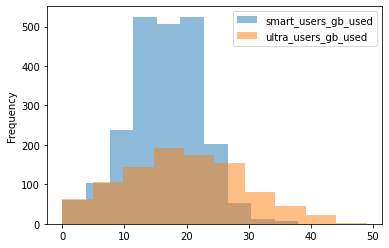

In [131]:
#Строим две гистограммы по столбцам 'gb_used' датафреймов smart_users и ultra_users
bins = 50
smart_users['gb_used'].plot.hist(bins, alpha=0.5, label = 'smart_users_gb_used')
ultra_users['gb_used'].plot.hist(bins, alpha=0.5, label = 'ultra_users_gb_used')
plt.legend(loc='upper right')
plt.show()

Из графика видно, что многие пользователи тарифа смарт превышают включенное в пакет количество гигабайтов, некоторые из них даже используют больше гигабайтов, чем включено в более дорогой пакет ультра. Однако, есть пользователи, которые совершено не используют интернет на устройстве с сим картой данного оператора.

Визуально большая или значимая часть пользователей тарифа ультра используют 30 и менее гигабайтов интернета, именно такое значение включено в пакет, но немалое количество пользователей, вынужденно платить дополнительно за гигабайты, пользователям тарифа ультра с избытком хватает минут и сообщений, но не интернета. 

Если сравнивать две гистограммы, то видно, что значения потраченных гигабайт у пользователей тарифов смарт и ультра отличаются, максимальное значение потраченных гб у пользователей тарифа ультра больше, чем у пользователей тарифа смарт, что вполне логично 

Неплохо было бы увеличить количество гигабайтов, входящих в пакет ультра,но, видимо, такой ход не является выгодным для оператора.

## Общее

На данном этапе хотелось бы проверить есть ли неактивные пользователи, которые не пользуются ни звонками, ни интернетом, ни сообщениями

In [132]:
non_active_ultra_users = ultra_users.query('messages_amount == 0 & calls_duration == 0 & gb_used == 0')

In [133]:
display(non_active_ultra_users)

,user_id,month,calls_duration,calls_amount,messages_amount,gb_used,tariff,tariff_expenses


In [134]:
non_active_smart_users = smart_users.query('messages_amount == 0 & calls_duration == 0 & gb_used == 0')

In [135]:
display(non_active_smart_users)

,user_id,month,calls_duration,calls_amount,messages_amount,gb_used,tariff,tariff_expenses


Таких пользователей нет

# Сравнение тарифов

Смотрим описание столбца 'tariff_expenses' двух датафреймов:

In [136]:
smart_users['tariff_expenses'].describe()

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: tariff_expenses, dtype: float64

In [137]:
ultra_users['tariff_expenses'].describe()

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: tariff_expenses, dtype: float64

In [138]:
#Смотрим медиану по столбцу 'tariff_expenses' датафрейма smart_users
smart_users['tariff_expenses'].median()

1023.0

In [139]:
#Смотрим медиану по столбцу 'tariff_expenses' датафрейма ultra_users
ultra_users['tariff_expenses'].median()

1950.0

In [140]:
print('Сумма общей выручки по тарифу ультра составила:', ultra_users['tariff_expenses'].sum())

Сумма общей выручки по тарифу ультра составила: 2039100


In [141]:
print('Сумма общей выручки по тарифу смарт составила:', smart_users['tariff_expenses'].sum())

Сумма общей выручки по тарифу смарт составила: 2875351


Как мы видим, компания получает больший доход с пользователей тарифа смарт, хотя среднее и медиана в датафрейме ultra_users столбца tariff_expenses больше, чем в датафрейме smart_users в аналогичном столбце, но из метода describe() мы  нашли логическое обьяснение этому- количество пользователей тарифа смарт больше количества пользователей тарифа ультра.
Визуализируем доходы компании по двум группам пользователей:

/tmp/ipykernel_170/2486896872.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


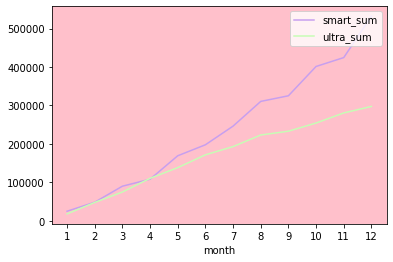

In [142]:
#Строим график динамики выручки по месяцам в разрезе тарифов
x = smart_users.groupby("month")["tariff_expenses"].sum().plot(kind="line", label = 'smart_sum', color = 'xkcd:lavender') 
y = ultra_users.groupby("month")["tariff_expenses"].sum().plot(kind="line", label = 'ultra_sum', color = 'xkcd:pale green') 
ax = plt.axes()
ax.set(facecolor = "pink")
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend(loc='upper right')
plt.show()

На нашем линейном графике доход разделён по месяцам, чтобы проследить тенденции.
Невооруженным взглядом можно увидеть, что в независимости от конкретного тарифа на графике видна тенденция увеличения дохода втечение года. Вероятно, мегалайн являлся новой компанией в 2018 году и поэтому, по мере развития притягивал новых и новых клиентов. Этим вполне можно обьяснить такой рост доходов.
В дополнение к графику сделаем еще аналогичные сводные таблицы.

In [143]:
smart_users.pivot_table(columns = 'month', values = 'tariff_expenses', aggfunc = 'sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
tariff_expenses,24525,48001,89676,107866,168849,197459,246014,310340,324986,401267,424403,531965


In [144]:
ultra_users.pivot_table(columns = 'month', values = 'tariff_expenses', aggfunc = 'sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
tariff_expenses,17550,47400,74550,110100,138000,171300,192750,222900,232800,254100,280350,297300


И из графика, и при сравнении сводных таблиц, мы видим, что помесячный доход от пользователей тарифа смарт преимущественно больше помесячного дохода от пользователей тарифа ультра. Конечно, есть месяца-исключения,но общая тенденция вполне заметна.

# Проверка гипотез

## Первая гипотеза

"Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"-эта гипотеза является двусторонней. Но я бы предпочла сделать это туверждение гипотезой 1, а гипотеза Н0 будет звучать так: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются, значит равны друг другу". Нам подойдет метод проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам

In [145]:
import random

In [146]:
#Делаем выборку из колонки tariff_expenses датафрейма smart_users
revenue_smart_users = smart_users['tariff_expenses']
revenue_smart_users = revenue_smart_users.tolist()

In [147]:
print('Средняя вырчка по пользователям тарифа смарт', smart_users['tariff_expenses'].mean())

Средняя вырчка по пользователям тарифа смарт 1289.9735307312696


In [148]:
revenue_ultra_users = ultra_users['tariff_expenses']
revenue_ultra_users = revenue_ultra_users.tolist()

In [149]:
print('Средняя вырчка по пользователям тарифа ультра',ultra_users['tariff_expenses'].mean())

Средняя вырчка по пользователям тарифа ультра 2070.1522842639592


In [150]:
alpha = .05 #задаём критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    revenue_ultra_users, revenue_smart_users)
#проверка гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) #выводим на экран получившеся p-значение

if results.pvalue < alpha:
    #сравниваем получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Мы не использовали дополнительный параметр equal_var = False, потому что у нас достаточно большие , к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.

Наше значение p value близко к нулю, а соответственно мы отвергаем нулевую гипотезу, а значит мы принимаем Н1 - "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"

## Вторая гипотеза

Для выдвижения гипотезы о зависимости выручки с пользователя от его города, нужно привести датафрейм в соответсвующий вид, нужно чтобы к users_data_joined добавилась информация о городе пользователя, а после этого разделить датафрейм на датафрейм с пользователями из Москвы и на датафрейм с пользователями из других регионов.

Нужно посмотреть есть ли неявные дубликаты в users_df по столбцу с городом

In [151]:
users_df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [152]:
#Создадим новый датафрейм 
users_city_table = users_df.groupby(['user_id'])['city'].sum()

In [153]:
display(users_city_table)

user_id
1000      Краснодар
1001         Москва
1002    Стерлитамак
1003         Москва
1004    Новокузнецк
           ...     
1495        Иркутск
1496        Вологда
1497      Челябинск
1498    Владикавказ
1499          Пермь
Name: city, Length: 498, dtype: object

In [154]:
#Сбросим индексацию
users_city_table = users_city_table.reset_index()

In [155]:
#Соединим два датафрейма
city_users = users_data_joined.merge(users_city_table, on = ['user_id'],  how ='outer')

In [156]:
display(city_users)

,user_id,month,calls_duration,calls_amount,messages_amount,gb_used,tariff,tariff_expenses,city
0,1000,5,159,22,22,3,ultra,1950,Краснодар
1,1000,6,172,43,60,23,ultra,1950,Краснодар
2,1000,7,340,47,75,14,ultra,1950,Краснодар
3,1000,8,408,52,81,14,ultra,1950,Краснодар
4,1000,9,466,58,57,15,ultra,1950,Краснодар
...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,11,smart,550,Санкт-Петербург
3210,1489,9,0,0,32,17,smart,950,Санкт-Петербург
3211,1489,10,0,0,21,20,smart,1550,Санкт-Петербург
3212,1489,11,0,0,20,18,smart,1150,Санкт-Петербург


In [157]:
#Создадим датафрейм с пользователя только из Москвы
moscow_users = city_users.query('city == "Москва"')

In [158]:
display(moscow_users)

,user_id,month,calls_duration,calls_amount,messages_amount,gb_used,tariff,tariff_expenses,city
8,1001,11,430,59,0,18,smart,1150,Москва
9,1001,12,414,63,0,14,smart,550,Москва
17,1003,8,380,55,37,9,ultra,1950,Москва
18,1003,9,961,134,91,13,ultra,1950,Москва
19,1003,10,855,108,83,15,ultra,1950,Москва
...,...,...,...,...,...,...,...,...,...
3120,1490,8,346,45,50,17,smart,950,Москва
3121,1490,9,322,44,48,15,smart,550,Москва
3122,1490,10,312,42,45,21,smart,1750,Москва
3123,1490,11,282,38,47,19,smart,1350,Москва


In [159]:
#Создадим датафрейм с пользователя из всех городов, кроме Москвы
other_cities_users = city_users.query('city != "Москва"')

In [160]:
display(other_cities_users)

,user_id,month,calls_duration,calls_amount,messages_amount,gb_used,tariff,tariff_expenses,city
0,1000,5,159,22,22,3,ultra,1950,Краснодар
1,1000,6,172,43,60,23,ultra,1950,Краснодар
2,1000,7,340,47,75,14,ultra,1950,Краснодар
3,1000,8,408,52,81,14,ultra,1950,Краснодар
4,1000,9,466,58,57,15,ultra,1950,Краснодар
...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,11,smart,550,Санкт-Петербург
3210,1489,9,0,0,32,17,smart,950,Санкт-Петербург
3211,1489,10,0,0,21,20,smart,1550,Санкт-Петербург
3212,1489,11,0,0,20,18,smart,1150,Санкт-Петербург


В задании нам дана гипотеза "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".Как и с прошлой гипотезой, я  предпочту сформулировать Н0, как "средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов" и соответственно Н1, как: "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

In [161]:
#Делаем выборку из колонки tariff_expenses датафрейма moscow_users
revenue_moscow_users = moscow_users['tariff_expenses']
revenue_moscow_users = revenue_moscow_users.tolist()

In [162]:
#Делаем выборку из колонки tariff_expenses датафрейма other_cities_users
revenue_other_cities_users = other_cities_users['tariff_expenses']
revenue_other_cities_users = revenue_other_cities_users.tolist()

In [163]:
print('Средняя выручка компании по клиентам из Москвы равна:', moscow_users['tariff_expenses'].mean())

Средняя выручка компании по клиентам из Москвы равна: 1546.7135842880523


In [164]:
print('Средняя выручка компании по клиентам из других городов равна:', other_cities_users['tariff_expenses'].mean())

Средняя выручка компании по клиентам из других городов равна: 1524.9362274298885


Как и в случае с первой гипотезой, нам подойдет метод проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам

In [165]:
alpha = .05 #задаём критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    revenue_moscow_users, revenue_other_cities_users)
#проверка гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) #выводим на экран получившеся p-значение

if results.pvalue < alpha:
    #сравниваем получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


хотя средняя выручка пользователей из Москвы и выручка пользователей из других регионов и не одинаковы, это явно слишком большая вероятность, чтобы делать вывод о значимом различии между выручками.

# Общий вывод

Тариф ультра с избытком покрывает потребности всех клиентов по протяженности звонков и количеству сообщений. Но этого тарифа не хватает, чтобы обеспечить всех пользователей количеством гигабайт, которых им хватало бы, некоторой части пользователей приходится доплачивать за и без того дорогой тариф. С другой стороны, покупать дополнительные гигабайты,являясь пользователем тарифа смарт довольно невыгодно из-за стоимости одного гб.
Выбор тарифа зависит от потребностей пользователя, в средних значениях протяженности звонков, количества сообщений и гигабайтов по двум датафреймам небольшая разница, но в данных есть большой разброс, о чем свидетельствуют большие размеры дисперсий и стандартных отклонений. 
Тариф ультра лучше подходит людям, использующим более 22 гигабайтов интернета, а для базовых потребностей тариф смарт однозначно лучше

Тариф ультра в перспективе может принести больше выручки для компании Мегалайн, но на данный момент, тариф смарт приносит больший доход. Значит, оптимальным решением для компании будет, например, решение о агитации пользователей тарифа смарт перейти на тариф ультра. Или начало усиленной рекламной компании тарифа ультра для привлечения новых пользователей.
Оператор должен обратить внимание на интернет-сессии с нулевым трафиком, возможно, дело в качестве интернет-соединения и из-за этого оператор теряет потенциальную выручку.
Кроме того, компании нужно проанализировать быстрый уход двух пользователей, которые не пользовались никакими услугами из тарифа.

Text(0, 0.5, 'Рубли')

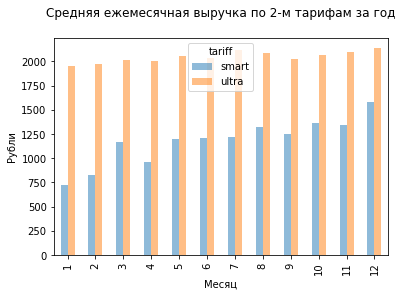

In [169]:
users_data_joined.pivot_table(index='tariff', columns='month', values='tariff_expenses', aggfunc='mean').T.plot(kind='bar', alpha=0.5)
plt.title('Средняя ежемесячная выручка по 2-м тарифам за год'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли')